<a href="https://colab.research.google.com/github/pornima30/App-Reviews-Sentiment-Analysis-using-Python/blob/main/App_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary python libraries and loading dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://statso.io/wp-content/uploads/2023/12/linkedin-reviews.csv")
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4



The dataset is comprised of two columns: one for reviews, containing textual feedback, and another for ratings, which includes numerical ratings. Let's examine the details of these columns.

In [3]:
df.columns

Index(['Review', 'Rating'], dtype='object')

**Exploratory Data Analysis:**

Now, we will systematically delve into the dataset. Our initial focus is on scrutinizing the distribution of ratings, aiming to gain insights into the overall sentiment conveyed in the reviews. Subsequently, we may extend our exploration to other aspects, such as assessing the length of reviews, potentially extracting valuable insights from the textual content.

We'll commence by examining the distribution of ratings.

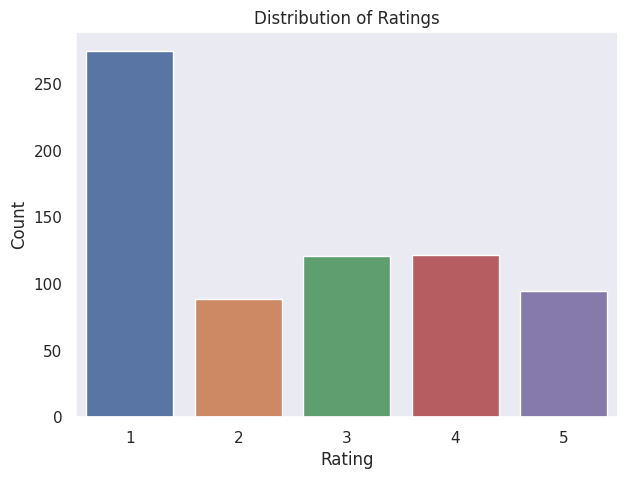

In [6]:
sns.set(style="dark")
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Here is the breakdown of ratings in the LinkedIn reviews dataset, offering a lucid depiction of the distribution across each rating category, ranging from 1 to 5.

Moving forward, analysis will shift towards evaluating the length of the reviews. This exploration is motivated by the potential correlation between review length and sentiment or feedback detail. This approach involves calculating the length of each review and subsequently presenting the data in a visual format.

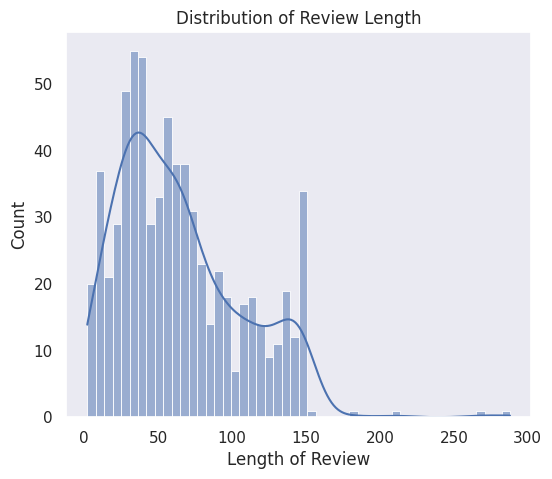

In [7]:
df['Review Length']=df['Review'].apply(len)
plt.figure(figsize=(6,5))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

The subsequent task involves imbuing the data with sentiment labels. To accomplish this, we will leverage TextBlob. TextBlob furnishes a polarity score that spans from -1 (indicating a highly negative sentiment) to 1 (indicating a highly positive sentiment) for a given text. Employing this score, we can categorize each review's sentiment into one of three classes: positive, neutral, or negative.

In [8]:
pip install textblob

Proceeding to annotate the dataset with sentiment labels utilizing TextBlob for sentiment analysis.

In [9]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

print(df.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


The dataset has been updated to incorporate sentiment labels for each review, categorizing them as Positive, Negative, or Neutral. These classifications are determined by the polarity score calculated through TextBlob analysis.

Dataset is now labeled, let's proceed with the sentiment analysis of app reviews. Initial step involves scrutinizing the distribution of sentiments within the dataset. This analysis aims to provide a foundational insight into the prevailing sentiment tendencies across the reviews.

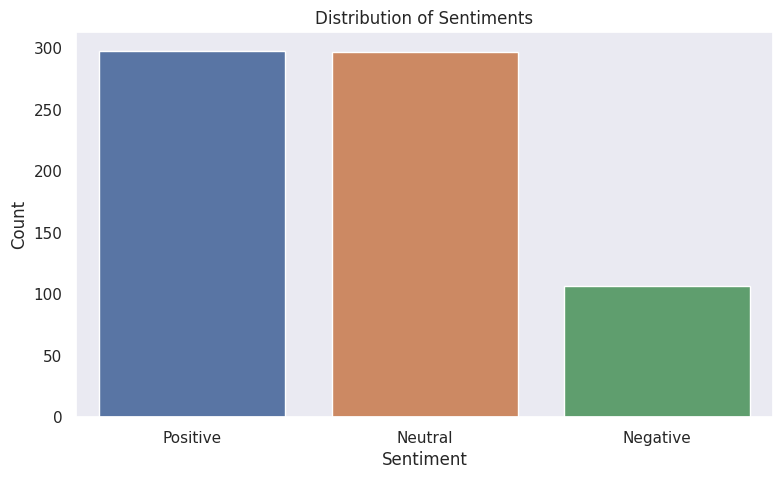

In [10]:
sentiment_distribution = df['Sentiment'].value_counts()

plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Indeed, despite the app receiving low ratings, it is noteworthy that reviewers do not frequently employ negative language in their app reviews.

Moving forward, our exploration will focus on unraveling the relationship between sentiments and ratings. This analysis aims to elucidate whether a correlation exists between the sentiment expressed in the text and the assigned numerical rating. We will investigate how sentiments are distributed across various rating levels to gain further insights.

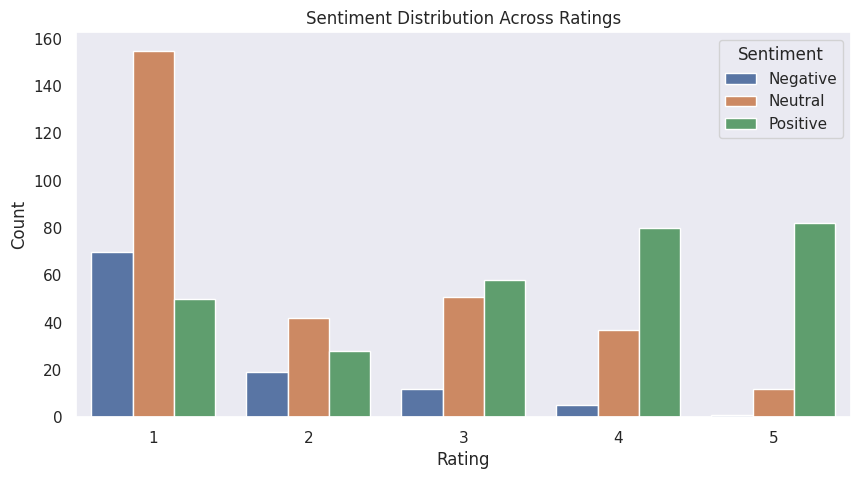

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

We will now undertake text analysis to discern common words or themes within each sentiment category. This involves scrutinizing the most frequently occurring words in positive, negative, and neutral reviews. To visualize this, we will generate a word cloud for each sentiment category, providing a graphical representation of the prominent words in the reviews.

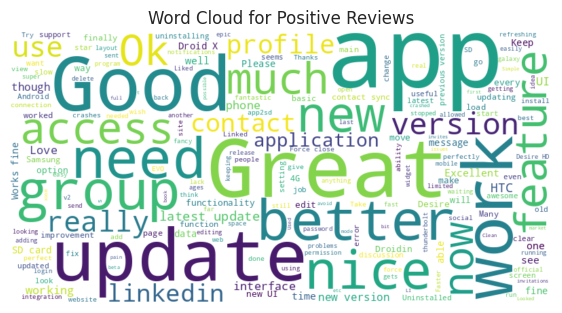

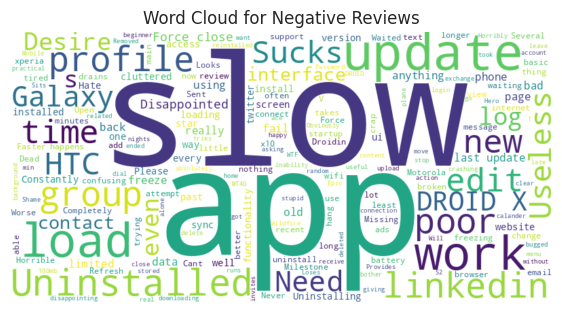

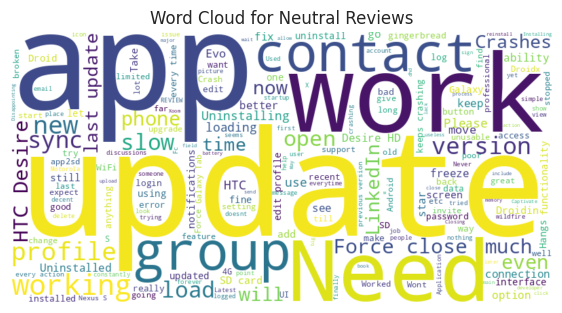

In [12]:
from wordcloud import WordCloud

def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

Indeed, that concludes the process of performing Reviews Sentiment Analysis using Python. By systematically analyzing ratings, sentiments, and textual content, this approach offers valuable insights into the overall sentiment trends and key themes within reviews.